In [1]:
import requests
import pandas as pd
from io import StringIO
import datetime
import dateutil
import matplotlib
matplotlib.use("webagg")
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [2]:
#cssegis = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv")
cssegis = pd.read_csv("covid.csv")
#cssegis.to_csv("covid.csv")

In [3]:
columns = cssegis.columns
dates_str = columns.str.match("[0-9][0-9]?/[0-9][0-9]?/20")
dates=pd.to_datetime(columns[dates_str])


<IPython.core.display.Javascript object>


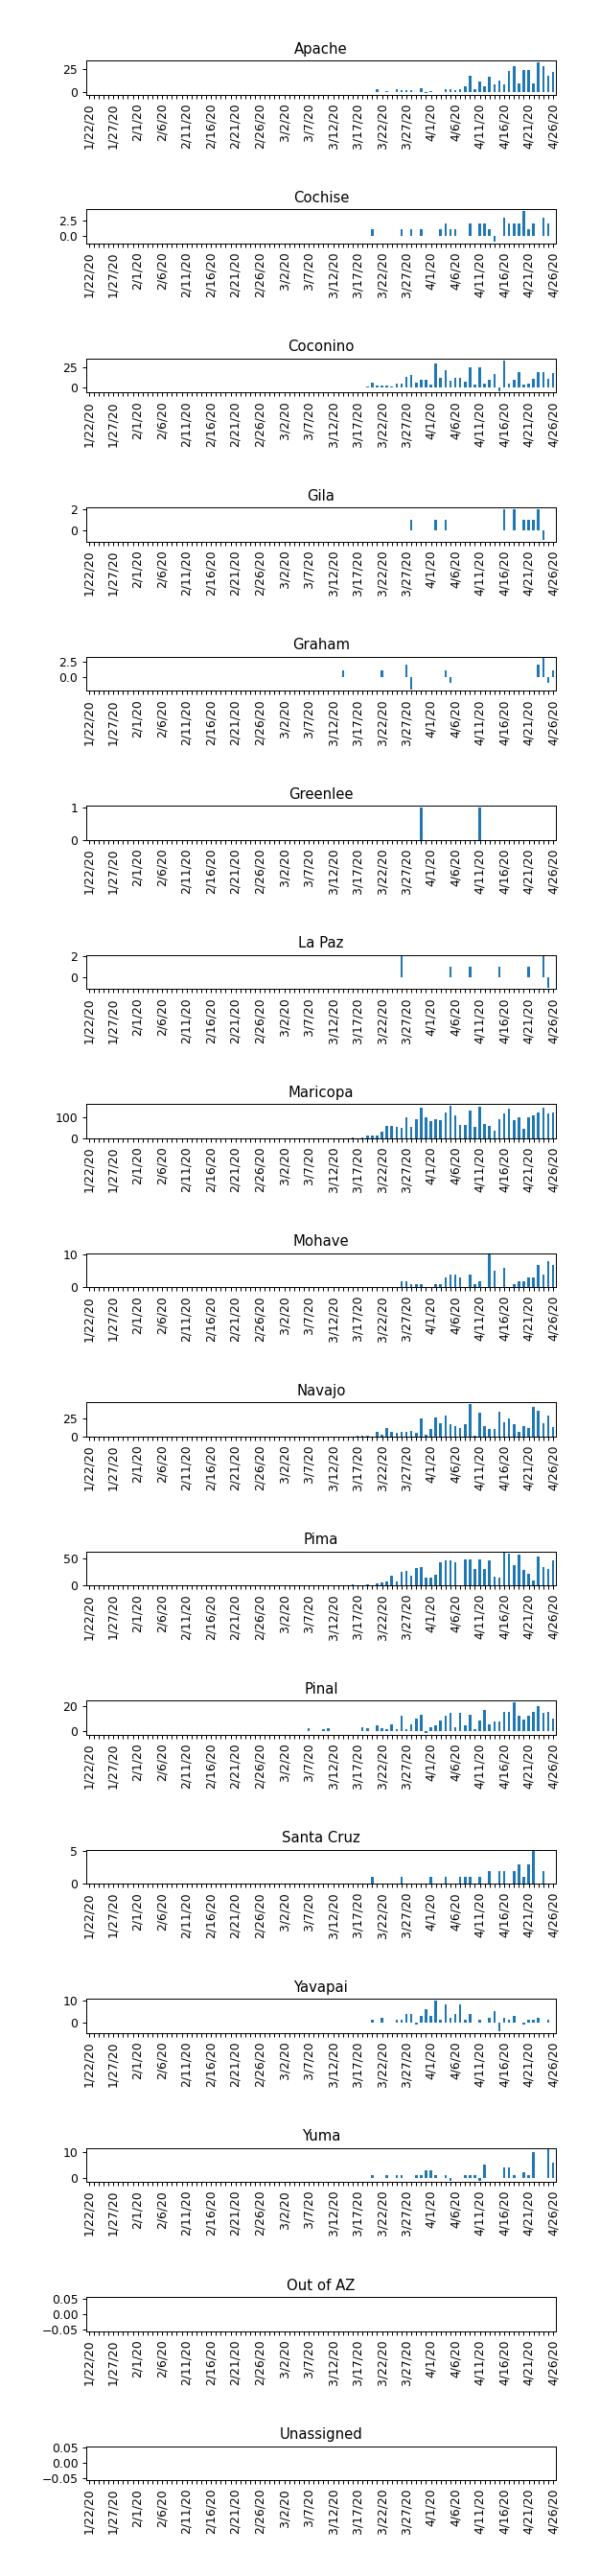

In [6]:

az = cssegis[cssegis["Province_State"] == "Arizona"]
dates=az.columns[11:]
az[dates]
xl = [""]*len(dates)
xl[::5] = dates[::5]

legend = []
fig, axes = plt.subplots(len(az), 1, figsize=(7,30))
jj=0
for ii,county in az.iterrows():
    if (county["Admin2"] == "Out of AZ" or county["Admin2"]== "Unassigned" ):
        pass
    ax=county[dates_str].diff().plot.bar(title=county["Admin2"], ax=axes[jj] )
    ax.set_xticklabels(xl)
    #county[dates_str].plot(ax=ax, style=".", grid=True)
    jj+=1
    
plt.tight_layout(pad=3.5)

    

In [64]:
cssegis[cssegis["Admin2"] == "Pima"]

,Unnamed: 0,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,...,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20
111,111,84004019,US,USA,840,4019.0,Pima,Arizona,US,32.097133,...,237,280,326,372,415,415,464,512,543,591


In [72]:
pima = az[az["Admin2"] == "Pima"].T[dates_str]
pima.index = dates
pima.plot(grid=True)
#plt.xticks(dates, dates[0::10].strftime("%m/%d/2020"), rotation=60)
#plt.xticks( dates[0::10].strftime("%m/%d/2020"), rotation=90)
#plt.tight_layout(pad=5)


ValueError: Length mismatch: Expected axis has 81 elements, new values have 82 elements

<IPython.core.display.Javascript object>


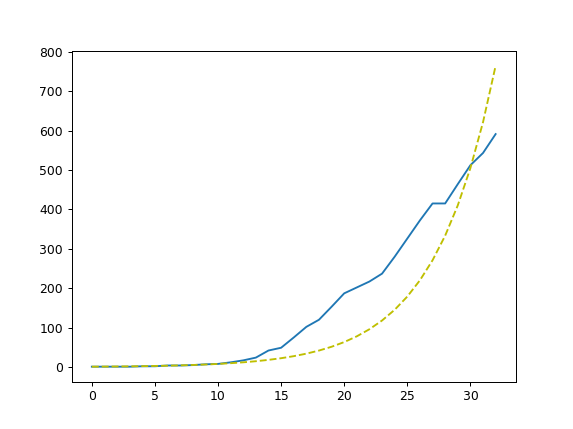

[  6.69436396 114.16166897]


In [75]:
def myexp(t,  n_E0, R0):
    Tau = t[-1]
    
    return np.power(n_E0*R0, t/Tau)


y = pima.to_numpy().T[0]
y=y[y>=1]
t=np.arange(len(y))
resp, cov = curve_fit(myexp, t, y, [3.72, 1], bounds=([1, 1], [8, 200]))
yfit = myexp(t, *resp)
ax = plt.plot(t, y)
plt.plot(t, yfit, "y--")
print(resp)

In [29]:
np.power

<ufunc 'power'>

<ipython-input-5-a06233a54114>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  clean_az = clean_az[az["Admin2"] != "Unassigned"]


<IPython.core.display.Javascript object>


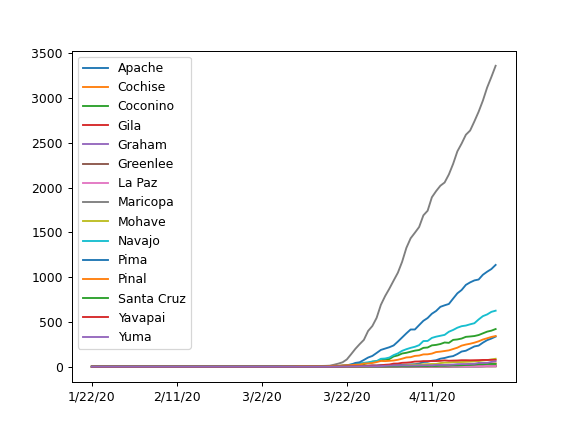

In [5]:
clean_az = az[az["Admin2"] != "Out of AZ"]
clean_az = clean_az[az["Admin2"] != "Unassigned"]
ax=clean_az[dates].T.plot()
ax.legend(az["Admin2"], loc="upper left")

<IPython.core.display.Javascript object>


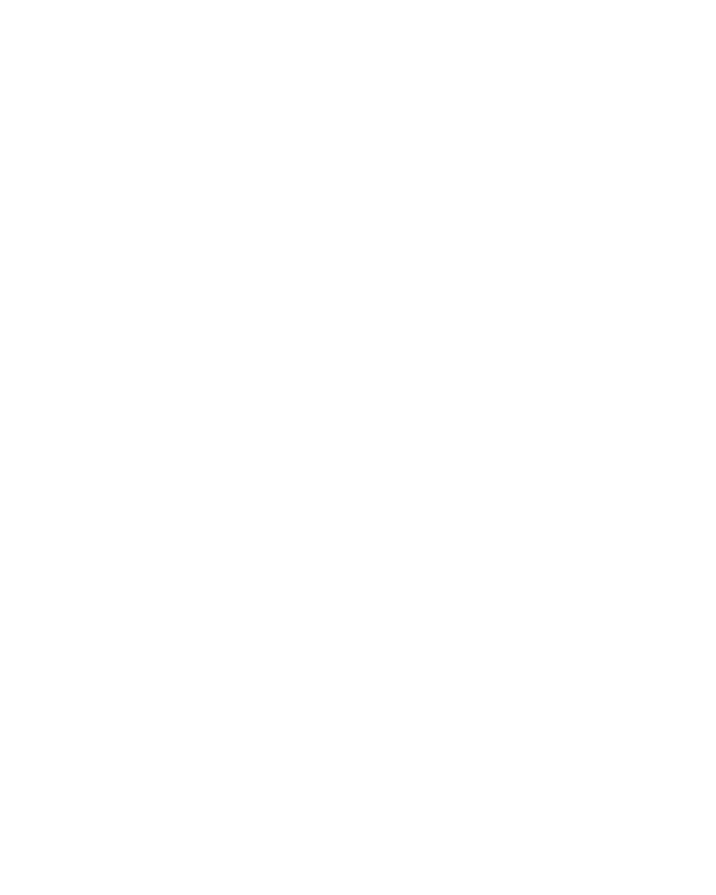

ValueError: attempt to assign sequence of size 0 to extended slice of size 47

In [118]:
fig, axes = plt.subplots(len(clean_az), 1, figsize=(8,10))
print(axes)

for ii,(_,county) in enumerate(clean_az.iterrows()):
    county[dates].T.diff().plot.bar(ax=axes[ii], sharex=axes[0])
    
#axes[-1].set_xticks(range(len(county))[::3])
xlabels = list(range(len(axes[-1].get_xticklabels())))
xlabels[::2] = ""

#axes[-1].set_xticklabels(dates[::3])

In [116]:
dates[::2]

Index(['1/22/20', '1/24/20', '1/26/20', '1/28/20', '1/30/20', '2/1/20',
       '2/3/20', '2/5/20', '2/7/20', '2/9/20', '2/11/20', '2/13/20', '2/15/20',
       '2/17/20', '2/19/20', '2/21/20', '2/23/20', '2/25/20', '2/27/20',
       '2/29/20', '3/2/20', '3/4/20', '3/6/20', '3/8/20', '3/10/20', '3/12/20',
       '3/14/20', '3/16/20', '3/18/20', '3/20/20', '3/22/20', '3/24/20',
       '3/26/20', '3/28/20', '3/30/20', '4/1/20', '4/3/20', '4/5/20', '4/7/20',
       '4/9/20', '4/11/20', '4/13/20', '4/15/20', '4/17/20', '4/19/20',
       '4/21/20', '4/23/20'],
      dtype='object')

In [114]:
list(range(20)[::3])

[0, 3, 6, 9, 12, 15, 18]